# Plot AAPL using matplotlib

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('./AAPL.csv')
df

,date,close,open,high,low,volume,change
0,2004-01-02,0.38,0.38,0.39,0.38,144.67M,0.00
1,2004-01-05,0.40,0.38,0.40,0.38,395.37M,5.26
2,2004-01-06,0.39,0.40,0.40,0.39,509.66M,-2.50
3,2004-01-07,0.40,0.39,0.41,0.39,586.96M,2.56
4,2004-01-08,0.42,0.41,0.42,0.40,460.33M,5.00
...,...,...,...,...,...,...,...
4849,2023-04-06,164.66,162.43,164.96,162.00,45.39M,0.55
4850,2023-04-10,162.03,161.42,162.03,160.08,47.03M,-1.60
4851,2023-04-11,160.80,162.35,162.36,160.51,46.31M,-0.76
4852,2023-04-12,160.10,161.22,162.06,159.78,49.40M,-0.44


In [2]:
df["date"] = pd.to_datetime(df['date'])
df

,date,close,open,high,low,volume,change
0,2004-01-02,0.38,0.38,0.39,0.38,144.67M,0.00
1,2004-01-05,0.40,0.38,0.40,0.38,395.37M,5.26
2,2004-01-06,0.39,0.40,0.40,0.39,509.66M,-2.50
3,2004-01-07,0.40,0.39,0.41,0.39,586.96M,2.56
4,2004-01-08,0.42,0.41,0.42,0.40,460.33M,5.00
...,...,...,...,...,...,...,...
4849,2023-04-06,164.66,162.43,164.96,162.00,45.39M,0.55
4850,2023-04-10,162.03,161.42,162.03,160.08,47.03M,-1.60
4851,2023-04-11,160.80,162.35,162.36,160.51,46.31M,-0.76
4852,2023-04-12,160.10,161.22,162.06,159.78,49.40M,-0.44


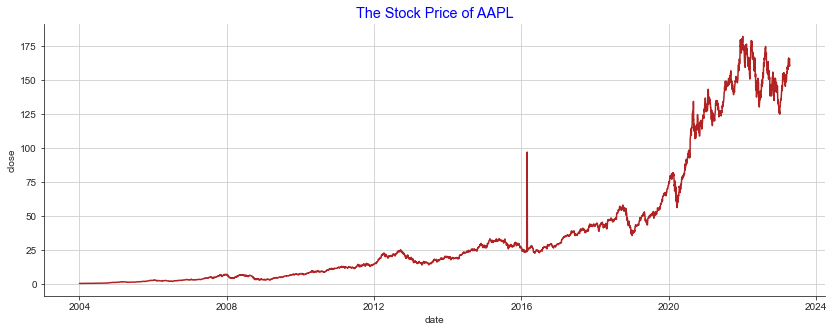

In [3]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df,x="date",y='close',color='firebrick')
sns.despine()
plt.title("The Stock Price of AAPL",size='x-large',color='blue')
plt.grid()

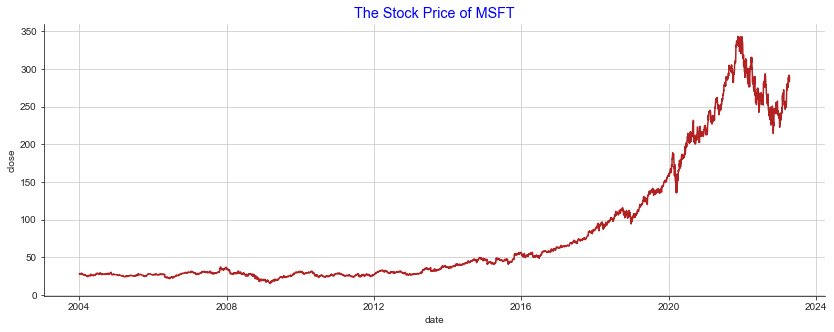

In [8]:
import os

def draw_graph(file_path: str, x: str, y: str, file_format: str, title: str, save: bool) -> None:
    """_summary_

    Args:
        file_path (str): file path to draw graph
        x (str): column to x
        y (str): column to y
        format (str): file format. png, html
        title (str): title of plot
        save (bool): whether save or not
    """
    df = pd.read_csv(file_path)
    assert x in df.columns, f"{x} column is not in {file_path}"
    assert y in df.columns, f"{y} column is not in {file_path}"

    if x == "date":
        df["date"] = pd.to_datetime(df['date'])
    if file_format == "png":
        plt.figure(figsize=(14,5))
        sns.set_style("ticks")
        sns.lineplot(data=df,x=x,y=y,color='firebrick')
        sns.despine()
        plt.title(title,size='x-large',color='blue')
        plt.grid()
        if save:
            os.makedirs("./plots", exist_ok=True)
            plt.savefig(f"./plots/{title}.png")
            
draw_graph(file_path="./MSFT.csv", x="date", y="close", file_format="png",
               title="The Stock Price of MSFT", save=True)